# Introduction
The Car Sales Adverts Dataset provided by AutoTrader has been analysed. The aim of was to tackle two main tasks, to identify which are the best features for predicting the price of the vehicles and analyse some bivariate/trivariate relationships among other features apart from price. To carry out these tasks the dataset is first loaded for reading and sampling. Then the data is understood using several pandas methods and visualisations. From the data understanding it was found that the dataset had eronous values such as missing values and outliers, which were then addressed and finally the dataset was prepared by dropping certain features for the analysis of best price predictors and relatiionship among other features.

The results from the tasks show that the dataset contains 402004 records and 12 features and of these 7 are categorical features. After reading the data it was found that there are large number of missing values and outliers which were then dealt with. After cleaning of the dataset some exploration of the dataset is presented through subsetting and grouping. To perform the main tasks I have then prepared the dataset and reduced it to 6 features. From the analysis it is illustrated that the probable main predictor features of the price of the vehicles are year of their registration, type of their fuels and bodies. I have also analysed some bivariate/trivariate relationships among year of registration, milleage, fuel type and standard make.

###Data Loading

In [1]:
#Data Loading
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
Path = 'drive/My Drive/Assessment'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    palette="Set3",
    style='whitegrid',
    color_codes=True,
)
sns.set({ "figure.figsize": (12/1.5,8/1.5) })

In [4]:
df = pd.read_csv(Path+'/adverts.csv')
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [5]:
df.sample(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
40124,202009183884084,25222.0,16,Black,Hyundai,i30,USED,2016.0,9000,Hatchback,False,Diesel
255777,202010305621923,28000.0,15,Silver,Mercedes-Benz,A Class,USED,2015.0,9995,Hatchback,False,Diesel
142285,202009183917247,36000.0,15,Green,Vauxhall,Corsa,USED,2015.0,4995,Hatchback,False,Petrol
219030,202007101086816,25343.0,17,Black,Audi,A4 Allroad,USED,2017.0,19995,Estate,False,Diesel
39670,202003188566020,52000.0,65,Black,Kia,Picanto,USED,2015.0,3690,Hatchback,False,Petrol
98706,202010285536430,117050.0,55,Blue,BMW,3 Series,USED,2005.0,3990,Saloon,False,Petrol
251001,202010124895854,60000.0,65,Blue,Volkswagen,Golf,USED,2015.0,9990,Hatchback,False,Diesel
139926,202009193925709,27334.0,17,Green,Vauxhall,Astra,USED,2017.0,8950,Hatchback,False,Diesel
343517,202010295562836,45113.0,66,Black,Land Rover,Discovery Sport,USED,2016.0,22888,SUV,False,Diesel
225765,202010215271194,5607.0,18,Blue,Hyundai,i10,USED,2018.0,7895,Hatchback,False,Petrol


In [6]:
df.tail()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
402000,202010315652942,5179.0,69,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
402001,202010315657341,110000.0,59,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
402002,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol
402004,201512149444029,14000.0,14,Silver,Audi,A4 Avant,USED,2014.0,20520,Estate,False,Diesel


###Data Understanding and Cleaning

In [7]:
#Data Understanding and cleaning
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [8]:
df.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [9]:
df.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


Some missing values are found from the first look at the dataset where Vehicle Condition = New there are missing values (NAN) for year of registration, reg code and the values of mileage ranges between 0 to 10
0.


In [10]:
df.loc[ df['vehicle_condition']=='NEW', ['mileage','year_of_registration','reg_code'] ]

,mileage,year_of_registration,reg_code
0,0.0,NaN,NaN
17,5.0,NaN,NaN
19,0.0,NaN,NaN
37,0.0,NaN,NaN
44,0.0,NaN,NaN
...,...,...,...
401860,10.0,NaN,NaN
401890,5.0,NaN,NaN
401902,10.0,NaN,NaN
401905,0.0,NaN,NaN


In [11]:
#Number of Missing values and removindg them
df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [12]:
df = df.dropna()
df.isnull().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [13]:
df.shape

(363424, 12)

In [14]:
#Unique values of all the categorical features
df['standard_make'].unique()

array(['Jaguar', 'SKODA', 'Vauxhall', 'Land Rover', 'Audi',
       'Mercedes-Benz', 'Volkswagen', 'Peugeot', 'SEAT', 'MINI', 'BMW',
       'Nissan', 'Mitsubishi', 'Citroen', 'Toyota', 'Volvo', 'Kia',
       'Renault', 'Honda', 'Bentley', 'DS AUTOMOBILES', 'Hyundai',
       'Aston Martin', 'Fiat', 'McLaren', 'Smart', 'Alfa Romeo',
       'Porsche', 'Abarth', 'Mazda', 'Suzuki', 'MG', 'Dacia', 'Subaru',
       'SsangYong', 'Maserati', 'Ferrari', 'Saab', 'Rolls-Royce', 'Lexus',
       'Jeep', 'Panther', 'Chevrolet', 'Lamborghini', 'Daihatsu', 'Dodge',
       'Isuzu', 'Tesla', 'TVR', 'Rover', 'Cadillac', 'Lotus', 'Infiniti',
       'Chrysler', 'Morgan', 'London Taxis International', 'Daimler',
       'CUPRA', 'Triumph', 'Perodua', 'Lincoln', 'Bugatti', 'Alpine',
       'Great Wall', 'Replica', 'Opel', 'Proton', 'Lancia', 'Austin',
       'Morris', 'Westfield', 'Maybach', 'LEVC', 'Iveco', 'Hummer',
       'Caterham', 'Carbodies', 'Jensen', 'Daewoo', 'Wolseley', 'Pilgrim',
       'Bristol', '

In [15]:
df['standard_model'].unique()

array(['XF', 'Yeti', 'Mokka', ..., 'MPV', 'Pininfarina', '480'],
      dtype=object)

In [16]:
df['standard_colour'].unique()

array(['Blue', 'Grey', 'Brown', 'Red', 'Bronze', 'Black', 'White',
       'Silver', 'Purple', 'Green', 'Orange', 'Yellow', 'Turquoise',
       'Gold', 'Beige', 'Burgundy', 'Multicolour', 'Pink', 'Maroon',
       'Magenta', 'Navy', 'Indigo'], dtype=object)

In this part of the Data Understanding process I will plot some bar plots showing the number of counts of "body_type", "fuel_type", "crossover_car_and_van" and "vehicle_condition". These features have less number of categories which makes plotting easier and could have some relationship between the prices of the vehicles. Then I hven plotted the Pearson Correlation Plot of all the numeric features which will show us which numeric features are mostly correlated with "price".

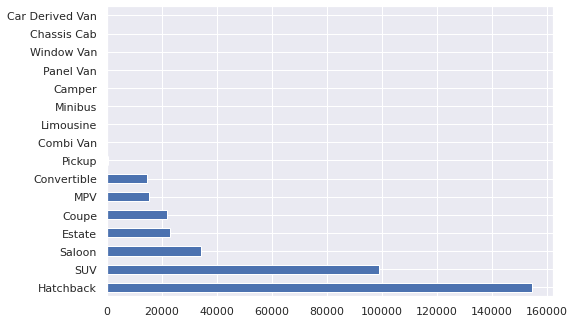

In [17]:
#It can be assumed that body type and fuel type could 
#be important features in predicting a vehicles price as a vehicles price may vary due to various body types and different types of fuels it runs on.
df['body_type'].value_counts().plot.barh()

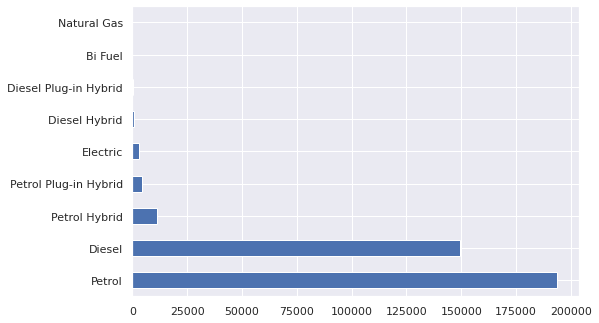

In [18]:
df['fuel_type'].value_counts().plot.barh()

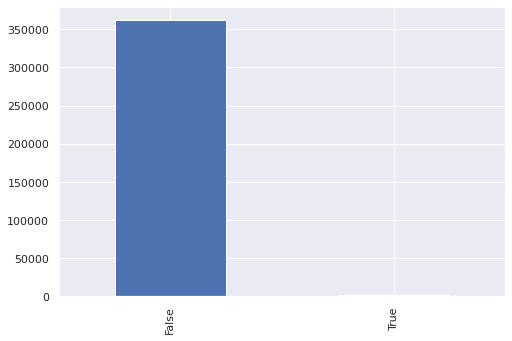

In [19]:
df['crossover_car_and_van'].value_counts().plot.bar()

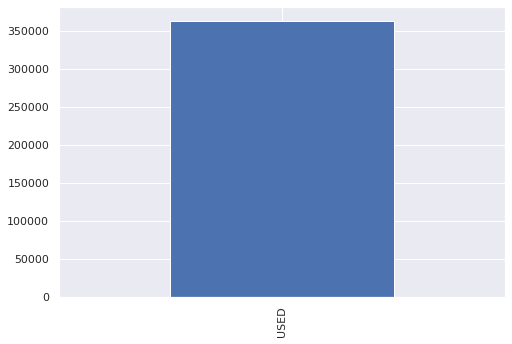

In [20]:
df['vehicle_condition'].value_counts().plot.bar()

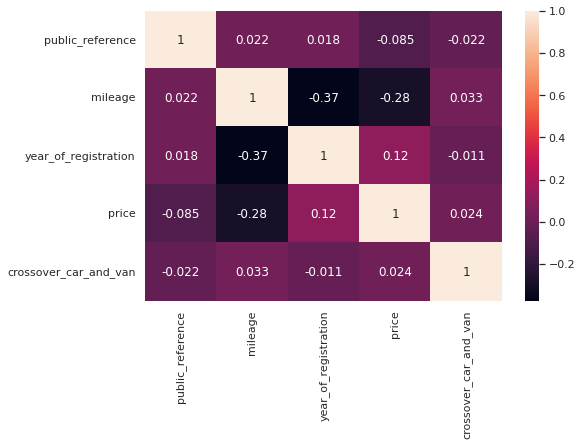

In [21]:
#Finding relationships between the numerical features
#https://datatofish.com/correlation-matrix-pandas/

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

The results from the above shows that "crossover_car_and_van" has very few True values and "vehicle_condition" only has USED vehicles as the NEW ones had some missing values in other columns which were removed. The correlation plot shows that the best numeric variable for predicting the price is "year_of_registration". So to analyse the relationships between features I will drop 'public_reference','reg_code','crossover_car_and_van','standard_colour','vehicle_condition' and 'standard_model' features.

In [22]:
#It is found from the correlation plot that public reference and mileage has very weak correlation between price and crossover car and van has very little true values
#Since vehicle condition has only USED values and vehicle make and standard color has a large number of unique values we can drop these columns. But for further
#Data analysis I am going to keep the features mileage and standard make.

df = df.drop(columns=['public_reference','reg_code','crossover_car_and_van','standard_colour','vehicle_condition','standard_model'],axis=1)
df.head()

,mileage,standard_make,year_of_registration,price,body_type,fuel_type
1,108230.0,Jaguar,2011.0,7000,Saloon,Diesel
2,7800.0,SKODA,2017.0,14000,SUV,Petrol
3,45000.0,Vauxhall,2016.0,7995,Hatchback,Diesel
4,64000.0,Land Rover,2015.0,26995,SUV,Diesel
5,16000.0,Audi,2017.0,29000,Convertible,Petrol


From the previous results of the data description can be seen that there is a huge difference in mean values of mileage and price so these columns contain outliers. The removal of these outliers are important as these data points are eronous. Ideas taken from: https://stackoverflow.com/questions/55471750/how-do-i-remove-outliers-using-multiple-columns-pandas

In [23]:
def cap_data(data2):
    for col in data2.columns:
        print("capping the ",col)
        if (((data2[col].dtype)=='float64') | ((data2[col].dtype)=='int64')):
            Q1 = data2.quantile(0.25)
            Q3 = data2.quantile(0.75)
            IQR = Q3 - Q1
            data2 = data2[~((data2 < (Q1 - 1.5 * IQR)) |(data2 > (Q3 + 1.5 * IQR))).any(axis=1)]
        else:
            data2[col]=data2[col]
    return data2
df=cap_data(df)

capping the  mileage
capping the  standard_make
capping the  year_of_registration


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


capping the  price
capping the  body_type
capping the  fuel_type


In [24]:
#Changing the year of registration data type for data visualisation
df['year_of_registration'] = df['year_of_registration'].astype(int)

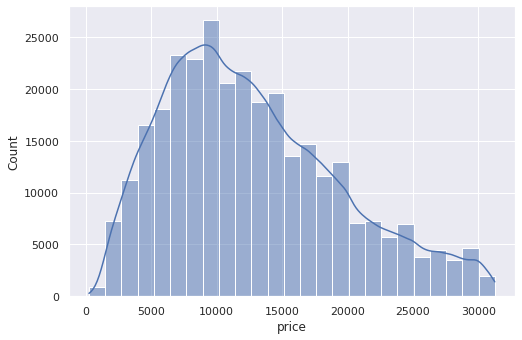

In [25]:
#Further visualisations for data understanding

#Distribution of price after data cleaning
sns.histplot(df['price'],bins=25,kde=True)

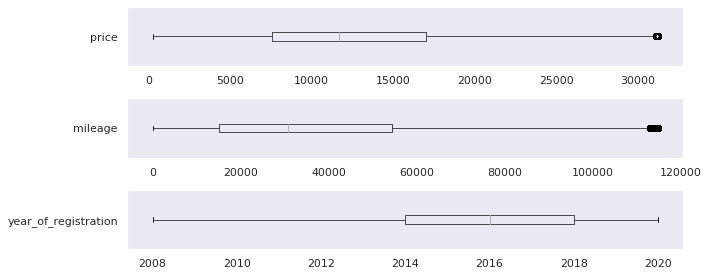

In [26]:
#Boxplots of all the chosen numeric features

# define numerical columns idea from https://www.kaggle.com/brittabettendorf/predicting-accident-severity-with-rf-smote
num_cols = ['price', 'mileage','year_of_registration']
# plotting boxplots
fig, axes = plt.subplots(3,1, figsize=(10,4))

for ax, col in zip(axes, num_cols):
    df.boxplot(column=col, grid=False, vert=False, ax=ax)
    plt.tight_layout();

In [27]:
#Some further understanding of the data through subsetting and grouping 

Most of the vehicles had a body type of Hatchback and fuelt type of petrol so the maximum price of those vehicles and their milleage, make, year of registration and fuel type are as follows.


In [28]:
df.loc[(df['fuel_type']=='Petrol') & (df['body_type']=='Hatchback')]['price'].max()

31250

In [29]:
df.loc[(df['price']==31250) & (df['body_type']=='Hatchback')]

,mileage,standard_make,year_of_registration,price,body_type,fuel_type
69416,3300.0,Volkswagen,2020,31250,Hatchback,Petrol
293452,4321.0,Peugeot,2020,31250,Hatchback,Petrol Plug-in Hybrid


In [30]:
#Vehicle make which is equal to the avg mileage
makedf = df.set_index(['standard_make', 'price'])
makedf.loc[makedf['mileage']==12000]

,,mileage,year_of_registration,body_type,fuel_type
standard_make,price,,,,
Toyota,16390,12000.0,2017,SUV,Petrol Hybrid
MINI,18995,12000.0,2018,SUV,Diesel
Renault,9995,12000.0,2016,Hatchback,Diesel
Peugeot,16990,12000.0,2019,Hatchback,Diesel
Honda,17499,12000.0,2017,SUV,Petrol
...,...,...,...,...,...
Kia,15490,12000.0,2017,SUV,Petrol
Jaguar,17100,12000.0,2017,Saloon,Diesel
Vauxhall,11295,12000.0,2018,Hatchback,Petrol


In [31]:
#Group of vehicles wih maximum mileages and prices
df.groupby('standard_make')[['mileage','price']].max()

,mileage,price
standard_make,,
Abarth,114000.0,30250
Aixam,9551.0,6300
Alfa Romeo,114697.0,31000
Aston Martin,75000.0,29995
Audi,114821.0,31250
...,...,...
Vauxhall,114818.0,30995
Volkswagen,114848.0,31250
Volvo,114566.0,31250


Analysis of relationships of some features between price

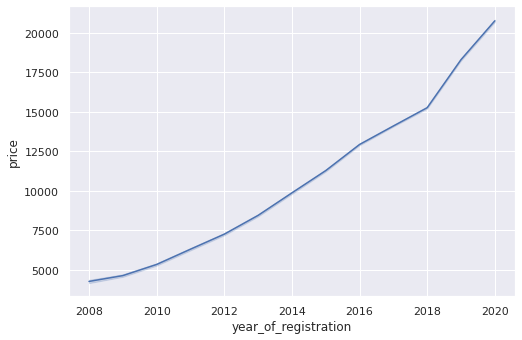

In [32]:
#Relationship between price and year of registrationv
sns.lineplot(x='year_of_registration',y='price',data=df);

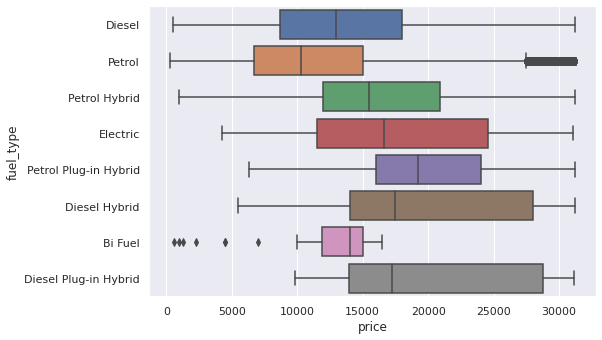

In [33]:
# Relationship between price and fuel type
sns.boxplot(x=df['price'], y='fuel_type', data=df);

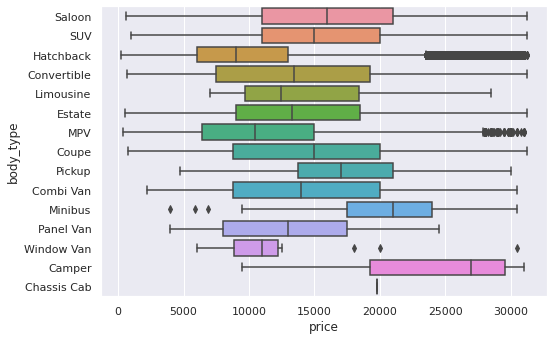

In [34]:
# Relationship between price and body type
sns.boxplot(x='price', y='body_type', data=df);

Understanding some further relationships among other features of the dataset

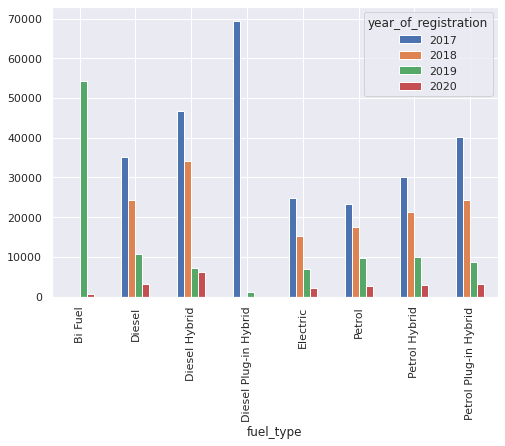

In [35]:
#Understanding of the relationship between avg mileage of vehicles of different fuel types between 2017 and 2020
df.groupby(['fuel_type', 'year_of_registration'])['mileage'].mean().unstack('year_of_registration').loc[:,2017:2020].plot.bar();

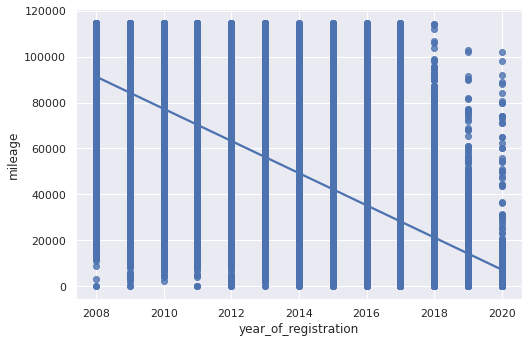

In [36]:
#Understanding of the relationship between mileage of vehicles over the years of their registration
sns.regplot(x='year_of_registration', y='mileage', data=df );

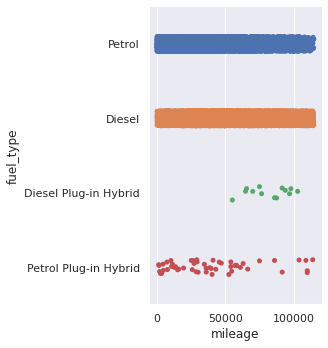

In [37]:
#Relationship between mileage and fuel type of Audi by a categorical plot
sns.catplot(y='fuel_type', x='mileage', data=df.loc[df['standard_make']=='Audi']);

#Conclusion
After loading the dataset I have observed that the vehicle conditions which are new has NaN (missing) values for the "reg_code" and "year_of_registration", also the values for their milleage ranges between 0 to 10, hence, I assumed that these data are missing and it is clear that vehicle condition is not an important feature. From the results of the descriptive statistics of the numeric features it is found that the max values are quite higher than the mean so this means that there were outliers in the dataset. So to clean the data I have dropped the missing values and removed the outliers. To identify the best numeric predictor of "price" I drew a correlation plot of the numeric features which shows that the "year_of_registration" is positively correlated to the price feature. After analysing the categorical variables I decided to drop features such as "reg_code", "standard_color" and "standard_model" as they have a higher number of unique values which makes plotting difficult and intuiatively they might not have any impacts on a vehicle prices. Although the "mileage" is negatively correlated I kept this feature along with "standard_make" to find out some relatiionships between other features. It is also seen that the "crossover_car_and_van" has only a few number of True values so I have also dropped this feature.

By drawing a lineplot of vehicle prices against the year of registration the output shows that as years increased so did the prices which means that there is a strong positive correlation between these two variables which indicates that the year of registration is an ideal predictor of the prices of the vehicles. To identify the reltionship between the body type and fuel type with price I have produced boxplots of fuel type and body type against the price and the results show that the mean price of the Petrol Plug-in Hybrid is higher than other body types which is about 20,000 and the least mean value is 15,000 for vehicles which run of Bi-Fuel. The vehicles of Camper body type has the highest mean prices compared to others at around 28,000 whereas the least value is around 9,000 for vehicles which have a body type of Window Van.

Apart from price I have performed some bivariate/trivariate analysis among the other features. To understand the relationship between the average mileage of vehicles of different fuel types between 2017 and 2020 I have produced a bar chart. The output shows that the average mileage for vehicles that run on all the fuel types remained low compared to other types in 2020. The highest average mileages were recored for vehicles running on Dissel Plug-In Hybrid was in 2017 and this trend was similar for other fuel types for the years. However, no values are seen for this fuel type for the years 2018 and 2020 which indicates that a very low number of vehicles ran on Dissel Plug-In Hybrid during this period whereas, no average mileages are found for vehicles running of Bi-Fuel for the years 2017 and 2018.

To understand the relationship between mileage of vehicles over the years of their registration I have produced a regression plot for the years against the mileage. The result shows that there is a strong negative correlation between these two features which is indicated by the downward regression line. Finally, to analyse the relationship between mileage and fuel type of Audi by generating a categorical plot. From this plot it can be seen that the least number of Audis run on Dissel and Petrol Plug-In Hybrid compared to those running on Petrol and Disel.

###Future Recommendations
Although it can be concluded that year of registration is one of the identified features that is a strong predictor of price, however the relationships between the price, body type and fuel type shown from these tasks are inconclusive so they need further analysis. To properly identify the the relationships between a categorical variable and a numeric variable further analysis such as Point biserial Correlation, Logistic Regression and so on are needed. Source: https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365 